In [30]:
import axelrod as axl
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
sns.set()
random.seed(19990901)

# The below experiment is to find whether the numbers of games affects the result of IPD

Analysing:   0%|          | 0/25 [00:00<?, ?it/s]/home/guangya/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:411: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=levels, labels=labels, names=idx.names)
Analysing: 100%|██████████| 25/25 [00:00<00:00, 104.63it/s]


Text(0,0.5,'count')

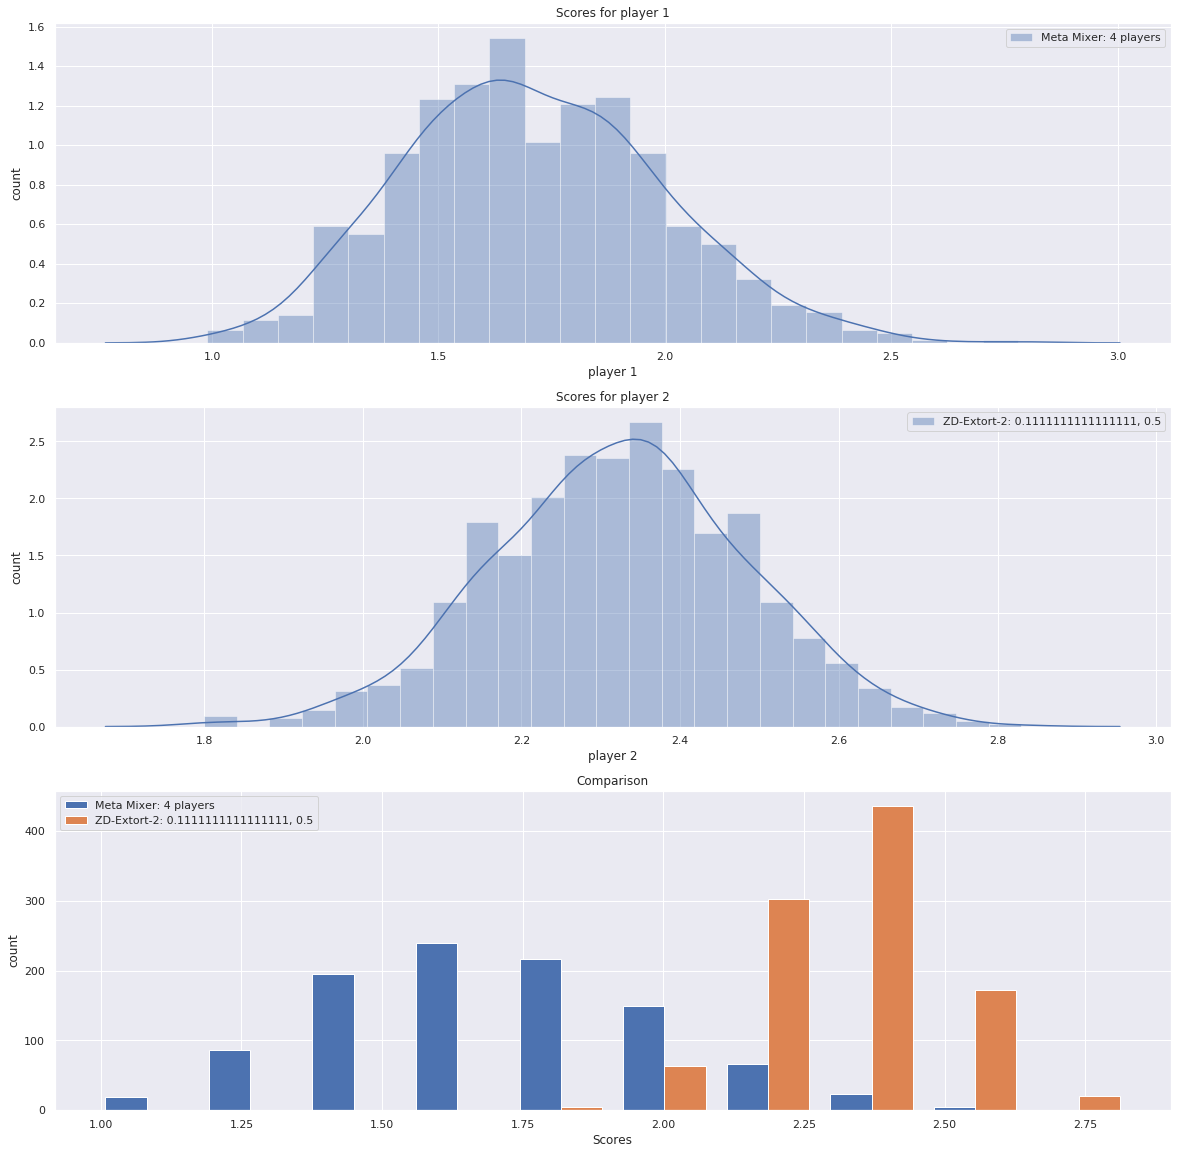

In [19]:
players = [axl.MetaMixer([axl.TitForTat,axl.Cooperator,axl.Defector,axl.Random],[0.25,0.25,0.25,0.25]),axl.ZDExtort2()]
tournament = axl.Tournament(players,turns = 100,repetitions=1000)
results1 = tournament.play()
fig,axes = plt.subplots(3,figsize = (20,20))
sns.distplot(results1.normalised_scores[0],label = results1.players[0],ax = axes[0])
sns.distplot(results1.normalised_scores[1],label = results1.players[1],ax = axes[1])
axes[0].set_title('Scores for player 1')
axes[0].set_xlabel('player 1')
axes[0].set_ylabel('count')
axes[1].set_title('Scores for player 2')
axes[1].set_xlabel('player 2')
axes[1].set_ylabel('count')
axes[0].legend()
axes[1].legend()
axes[2].hist(results1.normalised_scores,label = [results1.players[0],results1.players[1]])
axes[2].legend()
axes[2].set_title('Comparison')
axes[2].set_xlabel('Scores')
axes[2].set_ylabel('count')

Analysing: 100%|██████████| 25/25 [00:00<00:00, 139.26it/s]


Text(0,0.5,'count')

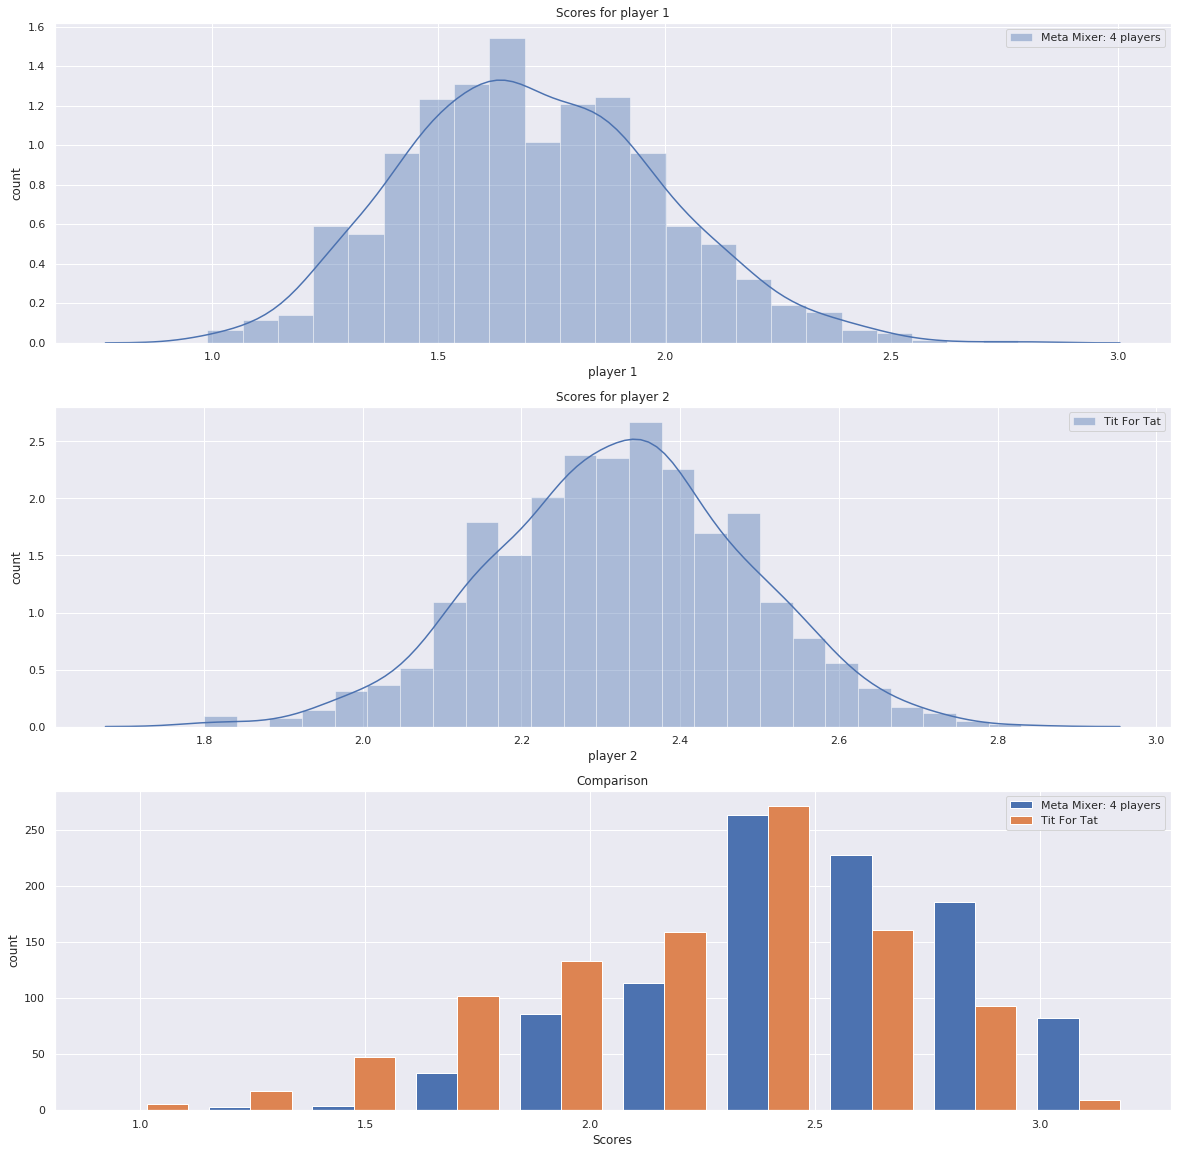

In [20]:
players = [axl.MetaMixer([axl.TitForTat,axl.Cooperator,axl.Defector,axl.Random],[0.25,0.25,0.25,0.25]),axl.TitForTat()]
tournament = axl.Tournament(players,turns = 10,repetitions=1000)
results2 = tournament.play()
fig,axes = plt.subplots(3,figsize = (20,20))
sns.distplot(results1.normalised_scores[0],label = results2.players[0],ax = axes[0])
sns.distplot(results1.normalised_scores[1],label = results2.players[1],ax = axes[1])
axes[0].set_title('Scores for player 1')
axes[0].set_xlabel('player 1')
axes[0].set_ylabel('count')
axes[1].set_title('Scores for player 2')
axes[1].set_xlabel('player 2')
axes[1].set_ylabel('count')
axes[0].legend()
axes[1].legend()
axes[2].hist(results2.normalised_scores,label = [results2.players[0],results2.players[1]])
axes[2].legend()
axes[2].set_title('Comparison')
axes[2].set_xlabel('Scores')
axes[2].set_ylabel('count')

# The below experiment is to compare Zero determinent strategies against various of other common ones



Playing matches:   0%|          | 0/3 [00:00<?, ?it/s]

Playing matches:  33%|███▎      | 1/3 [00:03<00:06,  3.02s/it]

Playing matches:  67%|██████▋   | 2/3 [00:05<00:02,  2.93s/it]

Playing matches: 100%|██████████| 3/3 [00:06<00:00,  2.30s/it]

Analysing:   0%|          | 0/25 [00:00<?, ?it/s]/home/guangya/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:411: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=levels, labels=labels, names=idx.names)


Analysing:   4%|▍         | 1/25 [00:00<00:04,  5.61it/s]

Analysing: 100%|██████████| 25/25 [00:00<00:00, 99.49it/s]

Playing matches:   0%|          | 0/3 [00:00<?, ?it/s]

Playing matches:  33%|███▎      | 1/3 [00:00<00:00,  2.04it/s]

Playing matches:  67%|██████▋   | 2/3 [00:01<00:00,  1.70it/s]

Playing matches: 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

Analysing:   0%|          | 0/25 [00:00<?, ?it/s]

Analysing:   4%|▍         | 1/25 [00:00<00:04,  5.38it/s]



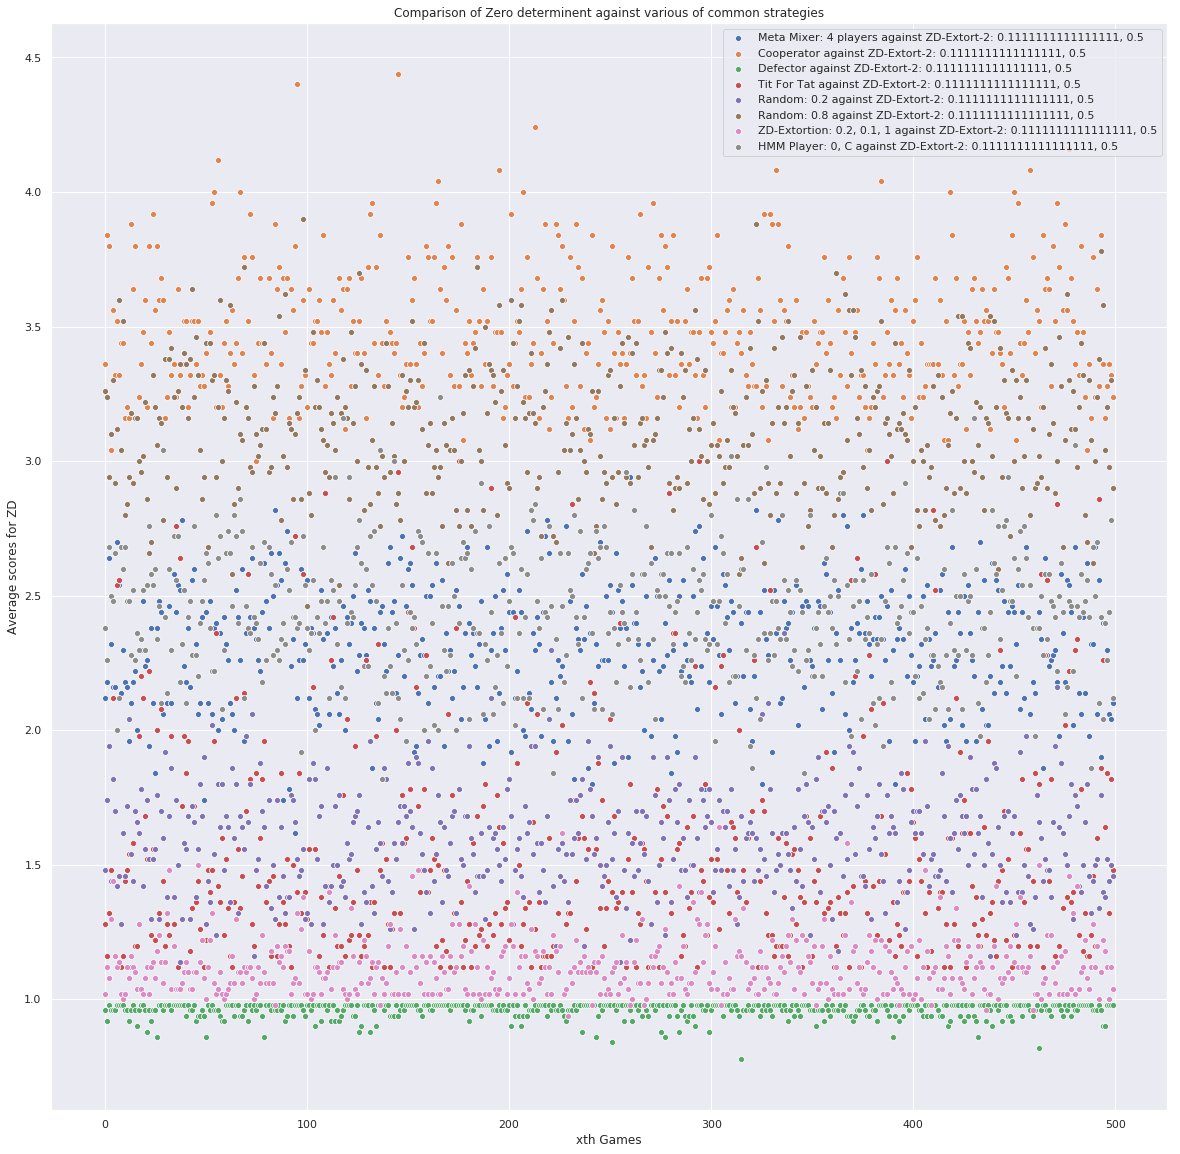

In [51]:
number_of_repetition = 500
number_of_turns = 50
players_set = [[axl.MetaMixer([axl.TitForTat,axl.Cooperator,axl.Defector,axl.Random],[0.25,0.25,0.25,0.25]),axl.ZDExtort2()],
               [axl.Cooperator(),axl.ZDExtort2()],
               [axl.Defector(),axl.ZDExtort2()],
               [axl.TitForTat(),axl.ZDExtort2()],
               [axl.Random(0.2),axl.ZDExtort2()],
               [axl.Random(0.8),axl.ZDExtort2()],
               [axl.ZDExtortion(),axl.ZDExtort2()],
               [axl.HMMPlayer(),axl.ZDExtort2()]
              ]
fig,ax = plt.subplots(figsize = (20,20)) 
for player in players_set:
    tournament = axl.Tournament(player,turns = number_of_turns,repetitions= number_of_repetition)
    results = tournament.play()
    sns.scatterplot(x = range(number_of_repetition),y = (results.normalised_scores[1]),label = results.players[0] + " against " + results.players[1])
    ax.set_title('Comparison of Zero determinent against various of common strategies')
    ax.set_xlabel('xth Games')
    ax.set_ylabel('Average scores for ZD')
    ax.legend()

# The below experiment is to find an optimized value of phi when against mixed player and titfortat



Playing matches:   0%|          | 0/3 [00:00<?, ?it/s]

Playing matches:  33%|███▎      | 1/3 [00:03<00:07,  3.61s/it]

Playing matches:  67%|██████▋   | 2/3 [00:05<00:03,  3.17s/it]

Playing matches: 100%|██████████| 3/3 [00:06<00:00,  2.35s/it]

Analysing:   0%|          | 0/25 [00:00<?, ?it/s]

Analysing:   4%|▍         | 1/25 [00:00<00:04,  4.96it/s]

Analysing: 100%|██████████| 25/25 [00:00<00:00, 107.13it/s]

Playing matches:   0%|          | 0/3 [00:00<?, ?it/s]

Playing matches:  33%|███▎      | 1/3 [00:00<00:00,  2.86it/s]

Playing matches:  67%|██████▋   | 2/3 [00:00<00:00,  2.85it/s]

Playing matches: 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

Analysing:   0%|          | 0/25 [00:00<?, ?it/s]

Analysing:   4%|▍         | 1/25 [00:00<00:03,  6.04it/s]

Analysing: 100%|██████████| 25/25 [00:00<00:00, 131.42it/s]

Playing matches:   0%|          | 0/3 [00:00<?, ?it/s]

Playing matches:  33%|███▎      | 1/3 [00:03<00:06,  3.14s/it]

Playing matches:  67%|██████▋   | 2/3 [0

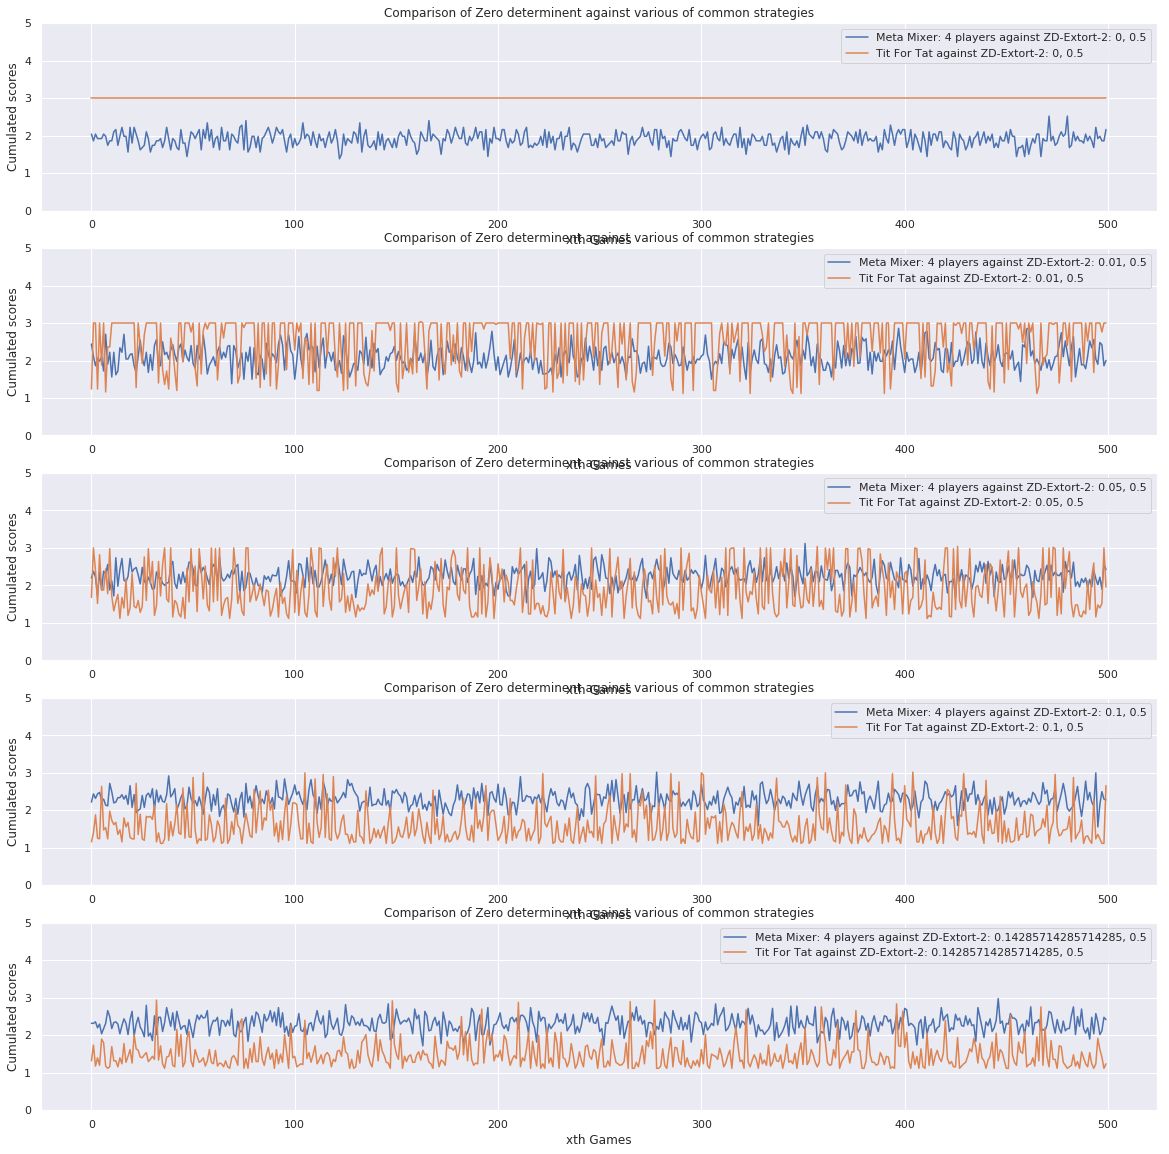

In [47]:
phi_set = [0,1/100,1/20,1/10,1/7]
fig,axes = plt.subplots(len(phi_set),figsize = (20,20)) 
count = 0
for phi in phi_set:
    players_set = [[axl.MetaMixer([axl.TitForTat,axl.Cooperator,axl.Defector,axl.Random],[0.25,0.25,0.25,0.25]),axl.ZDExtort2(phi=phi)],
                   [axl.TitForTat(),axl.ZDExtort2(phi=phi)],
                  ]
    for player in players_set:
        tournament = axl.Tournament(player,turns = number_of_turns,repetitions= number_of_repetition)
        results = tournament.play()
        sns.lineplot(x = range(number_of_repetition),y = results.normalised_scores[1],label = results.players[0] + " against " + results.players[1],ax = axes[count])
        axes[count].set_title('Comparison of Zero determinent against various of common strategies')
        axes[count].set_xlabel('xth Games')
        axes[count].set_ylabel('Average scores for ZD')
        axes[count].legend()
        axes[count].set_ylim(0,5)
    count += 1